In [11]:
import sys
sys.path.append('..')
from cmost_exposure import Exposure

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from datetime import datetime

font = {'size' : 14, 'family' : 'sans-serif'}
matplotlib.rc('font', **font)

cmost_dir = '../data'

In [4]:
# Load noise map data
ex = Exposure('{}/022321/cmostjpl001_20210223150105.fits'.format(cmost_dir))

print(ex.get_info())

 Properties: 
		Readout mode: DEFAULT 
		Date: 2021-02-23T15:02:28.075280 
		Exposure time: 100.0 ms
		LED voltage: 0.0 V 
		Temperature: 140.0 K
		Camera ID: cmostjpl 
		Detector ID: EuropaBSI-1-7-3
		Gain mode: high
		Number of frames: 99
		
		


In [7]:
print(ex.cds_frames.shape)

var_map = np.var(ex.cds_frames,axis=0)

(99, 2048, 4096)


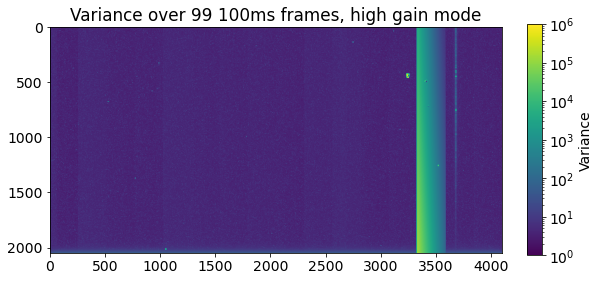

In [26]:
plt.figure(figsize=[9,5])
plt.title('Variance over 99 100ms frames, high gain mode')
plt.imshow(var_map,norm=colors.LogNorm(vmin=1, vmax=1e6))
plt.colorbar(fraction=0.05, aspect=15, shrink=0.85, label='Variance')
plt.savefig('plots/20210225_noisemap_highgain.pdf')
plt.show()

In [42]:
print(ex.cds_frames[:,2000,3330])
print(ex.cds_frames[:,500,3500])

[-4833. -1878. -1256. -1127. -1098. -1089. -1086. -1090. -1090. -1089.
 -1088. -1091. -1091. -1084. -1090. -1092. -1094. -1084. -1090. -1088.
 -1089. -1088. -1088. -1089. -1087. -1090. -1092. -1093. -1090. -1091.
 -1088. -1087. -1090. -1089. -1090. -1088. -1086. -1089. -1090. -1091.
 -1087. -1089. -1087. -1089. -1087. -1088. -1086. -1090. -1090. -1087.
 -1088. -1087. -1088. -1090. -1089. -1089. -1085. -1091. -1084. -1087.
 -1088. -1091. -1086. -1088. -1091. -1088. -1088. -1087. -1089. -1091.
 -1084. -1089. -1091. -1088. -1085. -1088. -1083. -1087. -1087. -1090.
 -1088. -1088. -1086. -1089. -1089. -1088. -1092. -1092. -1089. -1092.
 -1090. -1086. -1089. -1088. -1091. -1088. -1088. -1090. -1089.]
[-190. -111.  -92.  -91.  -90.  -90.  -92.  -88.  -89.  -87.  -87.  -87.
  -90.  -90.  -88.  -88.  -89.  -90.  -90.  -91.  -90.  -88.  -91.  -90.
  -92.  -88.  -90.  -89.  -87.  -89.  -90.  -90.  -89.  -93.  -88.  -90.
  -89.  -90.  -92.  -89.  -88.  -88.  -91.  -87.  -89.  -90.  -89.  -90.
  -9

This particular noisy column seems to have a) high negative values after CDS and b) variance dominated by first few exposures. Plotting the variance excluding the first few frames seems to indicate that this is due to an initial transient when the camera starts exposing and settles down after about five frames(this doesn't explain the negative values though). 

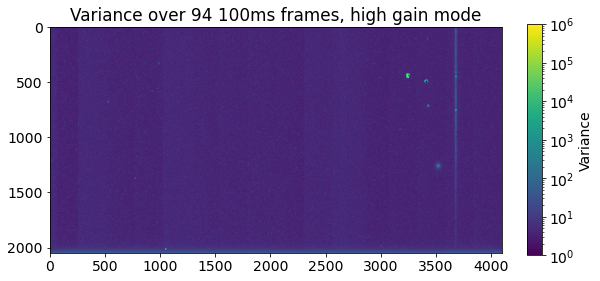

In [45]:
var_map_alt = np.var(ex.cds_frames[5:],axis=0)

plt.figure(figsize=[9,5])
plt.title('Variance over 94 100ms frames, high gain mode')
plt.imshow(var_map_alt,norm=colors.LogNorm(vmin=1, vmax=1e6))
plt.colorbar(fraction=0.05, aspect=15, shrink=0.85, label='Variance')
plt.savefig('plots/20210225_noisemap_highgain_excluding1stframes.pdf')
plt.show()

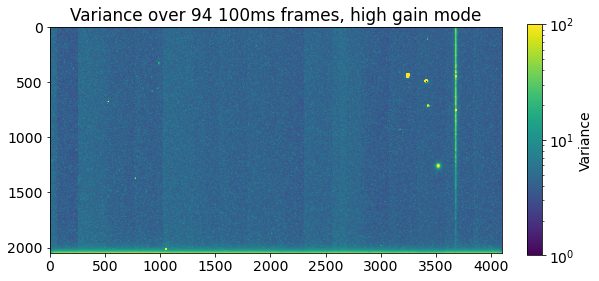

In [58]:
plt.figure(figsize=[9,5])
plt.title('Variance over 94 100ms frames, high gain mode')
plt.imshow(var_map_alt,norm=colors.LogNorm(vmin=1, vmax=100))
plt.colorbar(fraction=0.05, aspect=15, shrink=0.85, label='Variance')
plt.savefig('plots/20210225_noisemap2_highgain_excluding1stframes.pdf')
plt.show()

In [75]:
# Convert ADU variance to electrons variance using gain = 1.2
high_gain = 1.2
var_map_e = 1/high_gain**2 * var_map_alt

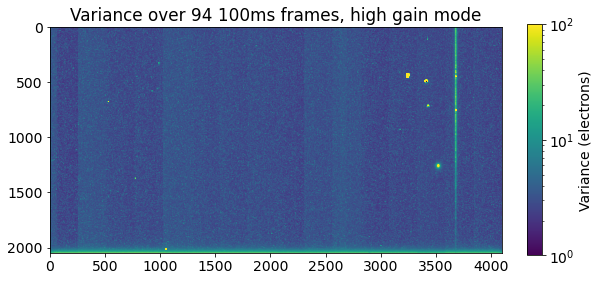

In [76]:
plt.figure(figsize=[9,5])
plt.title('Variance over 94 100ms frames, high gain mode')
plt.imshow(var_map_e,norm=colors.LogNorm(vmin=1, vmax=100))
plt.colorbar(fraction=0.05, aspect=15, shrink=0.85, label='Variance (electrons)')
plt.savefig('plots/20210225_noisemap_e_highgain_excluding1stframes.pdf')
plt.show()

In [79]:
# Histogram of pixel values, excluding outliers from artifacts
hist, bin_edges = np.histogram(var_map_e, bins=30, range=(0,30))

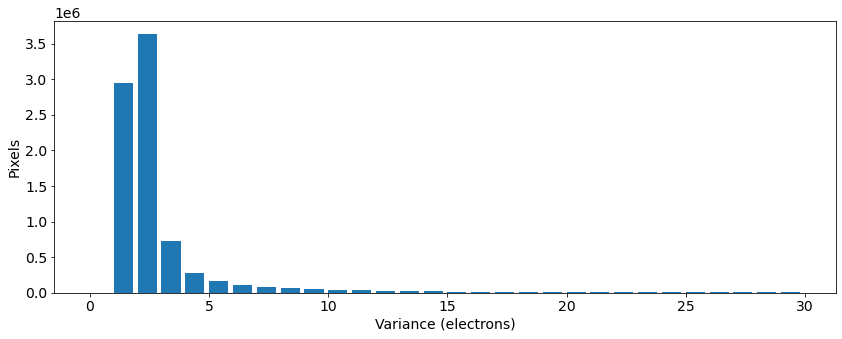

In [80]:
# Histogram of pixel values
# High-variance tail comes from rows > 2000
plt.figure(figsize=[14,5])
plt.bar(bin_edges[:-1],hist,width=0.8*(bin_edges[1]-bin_edges[0]),align="edge")
plt.xlabel('Variance (electrons)')
plt.ylabel('Pixels')
plt.savefig('plots/20210225_var_e_highgain_histogram.pdf')
plt.show()
plt.close()